In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

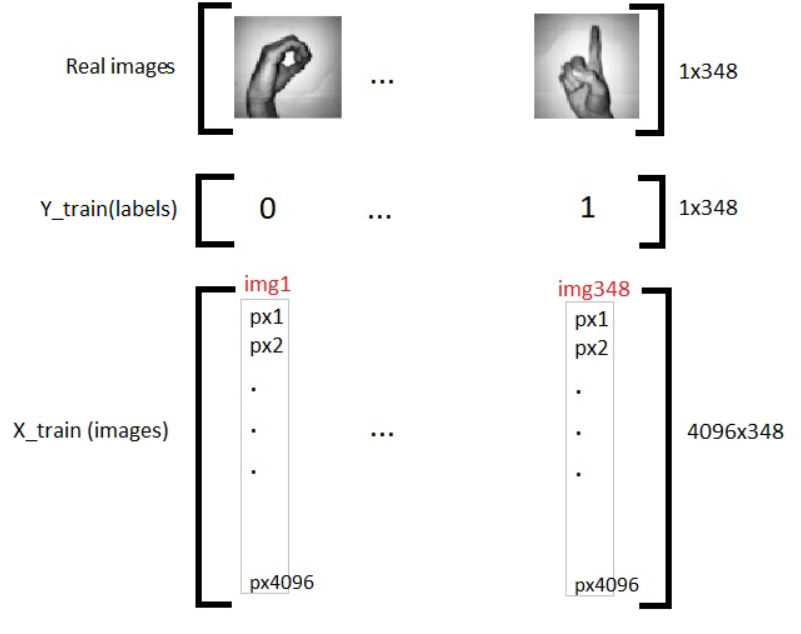

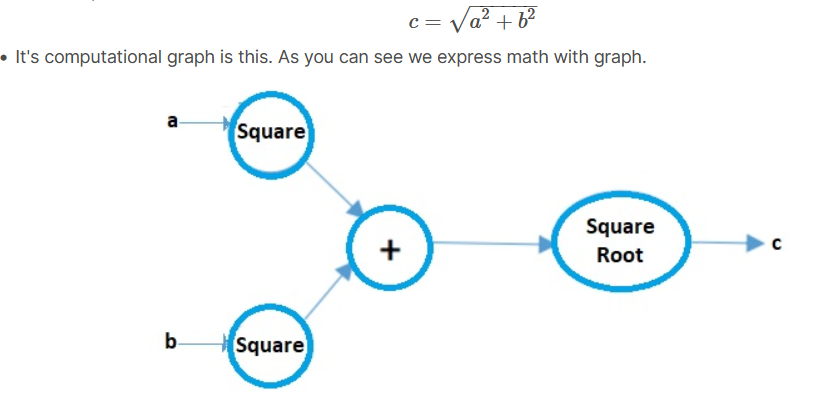

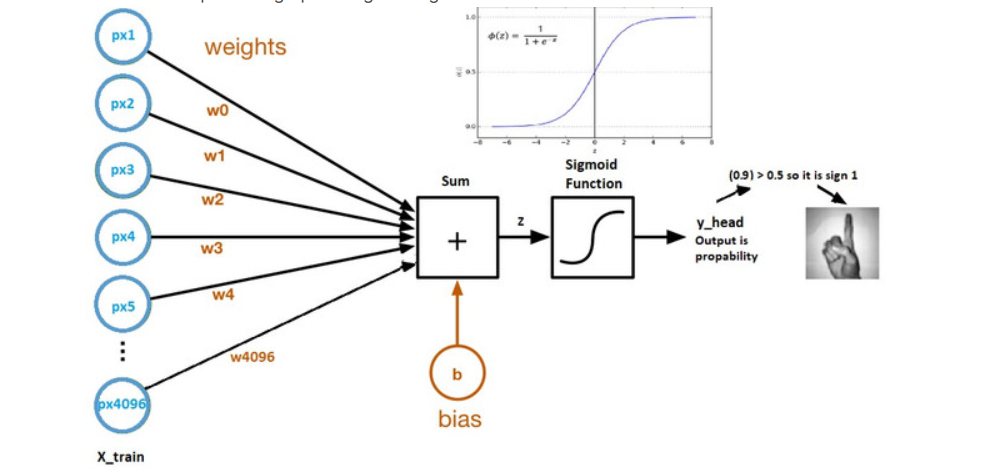

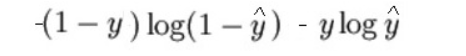

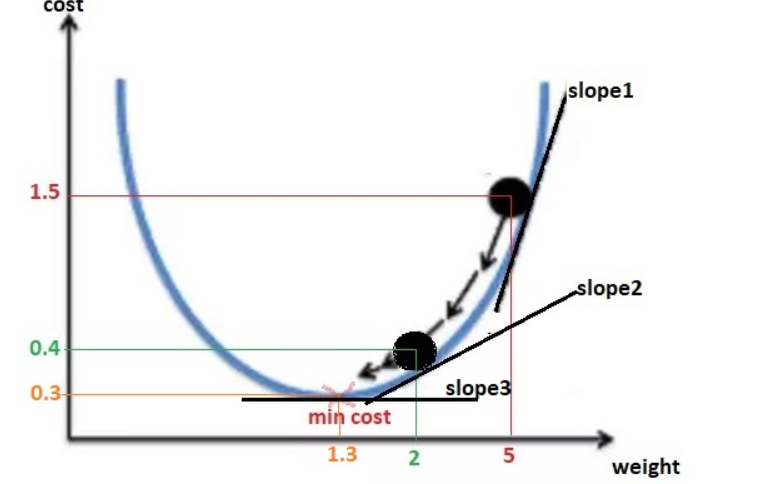

In [36]:
df=pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [37]:
## M -> Kötü Huylu
## B -> İyi Huylu

In [38]:
df=df.loc[:,"diagnosis":"fractal_dimension_worst"]

In [39]:
df.diagnosis=[1 if each=="M" else 0 for each in df.diagnosis]

In [40]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [41]:
y=df["diagnosis"].values
x=df.drop(["diagnosis"],axis=1)

In [42]:
#Normalization

In [43]:
x=(x-np.min(x))/(np.max(x)-np.min(x)).values

In [44]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [45]:
#Train Test Split

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [48]:
x_train=x_train.T
x_test=x_test.T
y_train=y_train.T
y_test=y_test.T

In [49]:
x_train.shape

(30, 455)

In [50]:
x_train

,68,181,63,248,60,15,290,137,155,517,...,330,214,466,121,20,71,106,270,435,102
radius_mean,0.096928,0.667755,0.103744,0.173648,0.150930,0.357755,0.351602,0.210564,0.249373,0.610961,...,0.428274,0.341190,0.291495,0.552747,0.288655,0.090255,0.220503,0.345923,0.331251,0.246060
texture_mean,0.257694,0.570172,0.140345,0.524518,0.174839,0.602976,0.338857,0.192087,0.278323,0.356781,...,0.196145,0.476835,0.373013,0.250592,0.202908,0.166723,0.291512,0.240446,0.335137,0.365573
perimeter_mean,0.103656,0.683505,0.106489,0.167369,0.143459,0.365835,0.360998,0.202267,0.238270,0.599198,...,0.428512,0.339161,0.291549,0.536314,0.289130,0.103656,0.216847,0.321401,0.327068,0.231014
area_mean,0.045387,0.495228,0.049799,0.086320,0.071432,0.218579,0.215270,0.108717,0.134380,0.454083,...,0.275589,0.198176,0.166872,0.395970,0.159703,0.042630,0.114104,0.207466,0.193425,0.133701
smoothness_mean,0.487226,0.554934,0.221901,0.396678,0.548614,0.553128,0.315428,0.395053,0.306130,0.461045,...,0.381692,0.379164,0.308026,0.476393,0.495351,0.408053,0.555836,0.105263,0.481809,0.248262
compactness_mean,0.373965,0.809214,0.208975,0.162444,0.187811,0.429790,0.454635,0.151862,0.145421,0.342372,...,0.361082,0.341145,0.274584,0.277958,0.330102,0.410159,0.252500,0.022606,0.288080,0.064413
concavity_mean,0.733365,0.582709,0.140300,0.055740,0.025398,0.384021,0.319119,0.082076,0.091026,0.330600,...,0.282099,0.261246,0.254217,0.341378,0.107029,0.201640,0.165651,0.016987,0.263824,0.055834
concave points_mean,0.217445,0.743539,0.108350,0.080268,0.064115,0.366004,0.328131,0.142893,0.115855,0.468738,...,0.349950,0.321173,0.174453,0.430666,0.154573,0.142744,0.173211,0.031064,0.321223,0.087972
symmetry_mean,0.530808,0.674242,0.646970,0.422727,0.850000,0.627778,0.330303,0.340404,0.459596,0.374747,...,0.364646,0.593434,0.253535,0.457576,0.458081,0.425253,0.374242,0.226263,0.307576,0.342929
fractal_dimension_mean,0.642376,0.505897,0.414280,0.280750,0.413648,0.438290,0.462511,0.183024,0.259478,0.251053,...,0.206403,0.302654,0.215670,0.256318,0.382266,0.839090,0.320977,0.080034,0.326032,0.143429


In [51]:
#Parameter İnitialize and Sigmoid Function

In [52]:
def initialize_weight_and_bias(dimension):
    
    weight=np.full((dimension,1),0.01)
    bias=0.0
    return weight,bias

In [53]:
initialize_weight_and_bias(30)

(array([[0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01],
        [0.01]]),
 0.0)

In [54]:
def sigmoid(z):
    y_head=1/(1+np.exp(-z))
    return y_head

In [55]:
sigmoid(0)

0.5

In [56]:
def forward_backward_propagation(w,b,x_train,y_train):
    #forward propagation
    z=np.dot(w.T,x_train)+b
    y_head=sigmoid(z)
    loss=-y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost=(np.sum(loss))/x_train.shape[1]
    
    #backward propagation
    der_weight=(np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] #ölçeklendirmek için 
    der_bias=np.sum(y_head-y_train)/x_train.shape[1] #ölçeklendirmek için
    gradients={"derivative_weight":der_weight,"derivative_bias":der_bias}
    return cost,gradients

In [57]:
#Weight And Bias Update

In [58]:
def update(w,b,x_train,y_train,learning_rate,number_of_iterarion):
    cost_list=[]
    cost_list2=[]
    index=[]
    
    
    #update parameters
    for i in range(number_of_iterarion):
        cost,gradients=forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        #update
        w=w-learning_rate*gradients["derivative_weight"]
        b=b-learning_rate*gradients["derivative_bias"]
        if i%10==0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iteration %i:%f"%(i,cost))
    #update parameters weight and bias
    parameters={"weight":w,"bias":b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation="vertical")
    plt.xlabel("Number Of İteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters,gradients,cost_list

In [59]:
def predict(w,b,x_test):
    z=sigmoid(np.dot(w.T,x_test)+b)
    y_pred=np.zeros((1,x_test.shape[1]))
    
    for i in range(z.shape[1]):
        if z[0,i]<=0.5:
            y_pred[0,i]=0
        else:
            y_pred[0,i]=1
    return y_pred

Cost after iteration 0:0.692977
Cost after iteration 10:0.499667
Cost after iteration 20:0.406616
Cost after iteration 30:0.351936
Cost after iteration 40:0.315762
Cost after iteration 50:0.289862
Cost after iteration 60:0.270257
Cost after iteration 70:0.254795
Cost after iteration 80:0.242214
Cost after iteration 90:0.231722
Cost after iteration 100:0.222796
Cost after iteration 110:0.215080
Cost after iteration 120:0.208317
Cost after iteration 130:0.202324
Cost after iteration 140:0.196961
Cost after iteration 150:0.192121
Cost after iteration 160:0.187722
Cost after iteration 170:0.183698
Cost after iteration 180:0.179997
Cost after iteration 190:0.176577
Cost after iteration 200:0.173402
Cost after iteration 210:0.170443
Cost after iteration 220:0.167676
Cost after iteration 230:0.165080
Cost after iteration 240:0.162638
Cost after iteration 250:0.160334
Cost after iteration 260:0.158155
Cost after iteration 270:0.156091
Cost after iteration 280:0.154131
Cost after iteration 290:

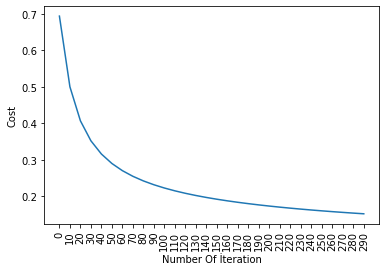

{'weight': array([[ 0.99337165],
        [ 1.00681244],
        [ 1.08577716],
        [ 1.33221229],
        [-0.43919546],
        [ 0.78670107],
        [ 2.08746654],
        [ 2.81872305],
        [-0.41083359],
        [-1.58253338],
        [ 1.19577302],
        [-0.50116614],
        [ 0.95021991],
        [ 0.93535839],
        [-0.67757526],
        [-0.70745791],
        [-0.42252926],
        [-0.27271629],
        [-0.73505658],
        [-0.81497682],
        [ 1.88579625],
        [ 1.64580763],
        [ 1.78956555],
        [ 1.72478557],
        [ 0.63306495],
        [ 1.11222205],
        [ 1.59654435],
        [ 2.76481132],
        [ 0.90691852],
        [ 0.15225355]]),
 'bias': -6.252820645440047}

In [69]:
def logistic_regression(x_train,y_train,x_test,y_test,learning_rate,num_iterations):
    
    #initialize
    dimension=x_train.shape[0]
    w,b=initialize_weight_and_bias(dimension)
    
    parameters,gradients,cost_list=update(w,b,x_train,y_train,learning_rate,num_iterations)
    y_pred_test=predict(parameters["weight"],parameters["bias"],x_test)
    
    return parameters
    print("test accuracy:{} %".format(100-np.mean(np.abs(y_pred_test-y_test)) * 100))
logistic_regression(x_train,y_train,x_test,y_test,learning_rate=1,num_iterations=300)

In [61]:
#Sklearn

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
lr=LogisticRegression()

In [64]:
lr.fit(x_train.T,y_train.T)

LogisticRegression()

In [65]:
print("test Accuracy {}".format(lr.score(x_test.T,y_test.T)))

test Accuracy 0.9824561403508771


In [66]:
print("Logistic Regression Paramters:",lr.coef_)

Logistic Regression Paramters: [[ 1.75085721  1.68346309  1.71591217  1.48031213  0.62936603  0.36121281
   1.32229985  2.04861953  0.46498412 -0.80475279  1.13415157  0.03342049
   0.85834946  0.75135875  0.02590344 -0.65913271 -0.29976147  0.19899659
  -0.26447474 -0.65276496  2.1904174   2.28939594  1.9800922   1.57285366
   1.42326457  0.79513605  1.33168351  2.48841341  1.38724561  0.29026112]]


In [67]:
self_log=[[ 0.99337165],
        [ 1.00681244],
        [ 1.08577716],
        [ 1.33221229],
        [-0.43919546],
        [ 0.78670107],
        [ 2.08746654],
        [ 2.81872305],
        [-0.41083359],
        [-1.58253338],
        [ 1.19577302],
        [-0.50116614],
        [ 0.95021991],
        [ 0.93535839],
        [-0.67757526],
        [-0.70745791],
        [-0.42252926],
        [-0.27271629],
        [-0.73505658],
        [-0.81497682],
        [ 1.88579625],
        [ 1.64580763],
        [ 1.78956555],
        [ 1.72478557],
        [ 0.63306495],
        [ 1.11222205],
        [ 1.59654435],
        [ 2.76481132],
        [ 0.90691852],
        [ 0.15225355]]
k=lr.coef_

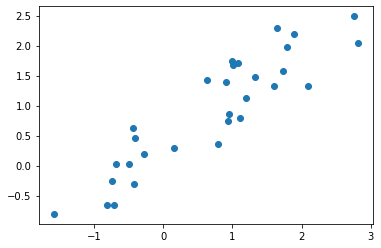

In [68]:
plt.scatter(self_log,k)
plt.show()